In [64]:
# svr son las siglas de "support vector regresion", donde usaremos las "support vector machines" o "svm"
# segun entendi lo que se hace es ver los puntos desde diferentes dimensiones y encontrar parametros con 
# los cuales hacer una regresion lineal adecuada usando los valores de esas dimensiones (ajustando un 
# parametro epsilon)

![ejercicio de separacion](svm_previo.jpg)

![uso de svm añadiendo dimension extra para separar](svm_dimensionExtra.jpg)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("Position_Salaries.csv")

In [67]:
x = df.iloc[:, 1:2].values
y = df.iloc[:, -1].values

## Aqui empezamos con las svr

In [68]:
from sklearn.svm import SVR
# kernel = formula que usarán para separar los datos (añadir las dimensiones)
regresion = SVR(kernel = "rbf")
regresion.fit(x, y)

SVR()

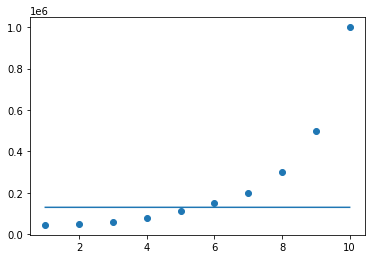

In [69]:
# graficamos
plt.scatter(x, y)
plt.plot(x, regresion.predict(x))
plt.show()

Como vemos hay un error, y es que estos datos hay que primero normalizarlos para aplicar la svr (la funcion no lo hace sola)

In [70]:
# aplico la normalizacion
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
x_normal = ss_x.fit_transform(x)
y_normal = ss_y.fit_transform(y.reshape(-1, 1))

In [71]:
# ahora sí usamos los svr
regresion_normal = SVR(kernel = "rbf")
regresion_normal.fit(x_normal, y_normal.ravel())
# explicacion .ravel()
# https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
# y_normal is a numpy array (shape: (n,1))
# .ravel will convert that array shape to (n, ) (i.e. flatten it)

SVR()

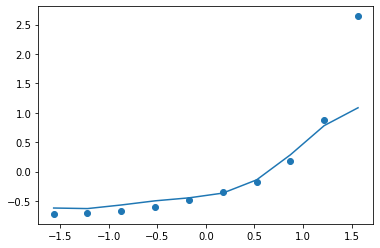

In [76]:
# graficamos
plt.scatter(x_normal, y_normal)
plt.plot(x_normal, regresion_normal.predict(x_normal))
plt.show()

notamos que es una buena prediccion (a excepcion del último punto), pero esta prediccion tiene los datos normalizados (estan centrados en 0), asi que para volverlo a los datos de antes, hay que hacer las transformaciones inversas

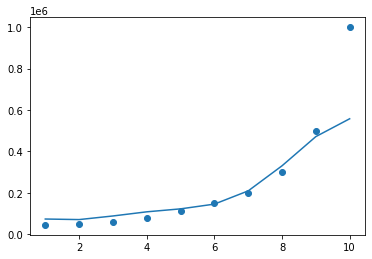

In [77]:
# graficar los datos con las escalas iniciales
# x ya lo tenemos listo porque tenemos los datos iniciales
y_predecidos_normalizados = regresion_normal.predict(x_normal)
y_predecidos_escala_original = ss_y.inverse_transform(y_predecidos_normalizados)
plt.scatter(x, y)
plt.plot(x, y_predecidos_escala_original)
plt.show()